# Módulo 10 

**Visualización de datos, parte 2**

*Juliho Castillo*

## Instrucciones 

### Antes de empezar

En este ejercicio, visualizaras gráficamente datos provenientes de un archivo .CSV mediante la biblioteca matplotlib de Python de manera que puedas resolver el problema que aquí se detalla.

Entregable: Un Jupyter Notebook (archivo de extensión .ipynb), archivo PDF y capturas de pantallas en espacio de respuesta que muestren tanto el código desarrollado como la solución al problema planteado, incluyendo los comentarios que sean pertinentes a las preguntas que se plantean. Entregas sin estos elementos no serán calificadas.

¡Buena suerte!

### Paso a paso:

1. Descargue el archivo CSV “SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv” de la siguiente página (que contiene información demográfica mundial).
2. Mediante el uso de gráficos de su preferencia (de acuerdo a los diversos tipos discutidos en este módulo), muestre la relación que guardan la tasa de mortalidad infantil (infant mortality for both sexes) con la esperanza de vida para ambos sexos (life expectancy at birth for both sexes) para el año 2020. 
3. Asimismo, determine qué variables de esta base de datos se encuentran más correlacionadas en dicho año. Interprete sus resultados.
4. Su evaluación en esta actividad dependerá del impacto visual y detalle que proyecten sus gráficos, así como de la explicación que aporte en sus observaciones. 
   1. Nota: Será necesario que “limpie” los datos para su análisis.

In [19]:
'''
Paso 1

Descargue el archivo CSV “SYB64_246_202110_Population Growth, Fertility and Mortality Indicators.csv” de la siguiente página (que contiene información demográfica mundial).
'''

import pandas as pd

data = pd.read_csv('./data.csv', encoding='ISO-8859-1')

data.head()

,T03,Population growth and indicators of fertility and mortality,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Region/Country/Area,NaN,Year,Series,Value,Footnotes,Source
1,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."


In [20]:
'''
Paso 2
Mediante el uso de gráficos de su preferencia (de acuerdo a los diversos tipos discutidos en este módulo), muestre la relación que guardan la tasa de mortalidad infantil (infant mortality for both sexes) con la esperanza de vida para ambos sexos (life expectancy at birth for both sexes) para el año 2020. 
'''
# Renombrar columnas basado en la información de la primera fila
data.columns = ['Region/Country/Area', 'Country/Area', 'Year', 'Series', 'Value', 'Footnotes', 'Source']

# Eliminar la primera fila ya que ahora es redundante
data = data.drop(index=0)

# Convertir la columna 'Year' a entero y 'Value' a flotante para poder filtrar y realizar análisis
data['Year'] = data['Year'].astype(int)
data['Value'] = pd.to_numeric(data['Value'], errors='coerce')

# Filtrar los datos para el año 2020
data_2020 = data[data['Year'] == 2020]

# Mostrar las primeras filas del conjunto de datos filtrado para revisión
data_2020.head()

,Region/Country/Area,Country/Area,Year,Series,Value,Footnotes,Source
15,1,"Total, all countries or areas",2020,Population annual rate of increase (percent),0.9,NaN,"United Nations Population Division, New York, ..."
16,1,"Total, all countries or areas",2020,Total fertility rate (children per women),2.3,NaN,"United Nations Population Division, New York, ..."
17,1,"Total, all countries or areas",2020,"Infant mortality for both sexes (per 1,000 liv...",28.3,NaN,"United Nations Statistics Division, New York, ..."
18,1,"Total, all countries or areas",2020,"Maternal mortality ratio (deaths per 100,000 p...",223.0,NaN,"World Health Organization (WHO), the United Na..."
19,1,"Total, all countries or areas",2020,Life expectancy at birth for both sexes (years),72.0,NaN,"United Nations Population Division, New York, ..."


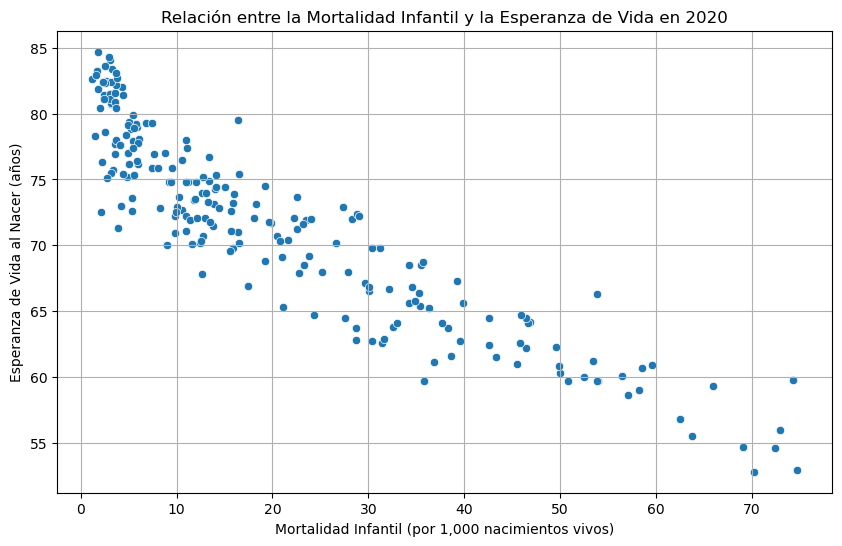

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para las series de interés
mortalidad_infantil = data_2020[data_2020['Series'] == 'Infant mortality for both sexes (per 1,000 live births)']
esperanza_vida = data_2020[data_2020['Series'] == 'Life expectancy at birth for both sexes (years)']

# Unir los datasets basados en 'Region/Country/Area' para tener ambas variables en el mismo DataFrame
merged_data = pd.merge(mortalidad_infantil[['Region/Country/Area', 'Value']], esperanza_vida[['Region/Country/Area', 'Value']], on='Region/Country/Area', suffixes=('_mortalidad_infantil', '_esperanza_vida'))

# Visualización: Gráfico de dispersión de la mortalidad infantil vs. esperanza de vida
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Value_mortalidad_infantil', y='Value_esperanza_vida')
plt.title('Relación entre la Mortalidad Infantil y la Esperanza de Vida en 2020')
plt.xlabel('Mortalidad Infantil (por 1,000 nacimientos vivos)')
plt.ylabel('Esperanza de Vida al Nacer (años)')
plt.grid(True)
plt.show()

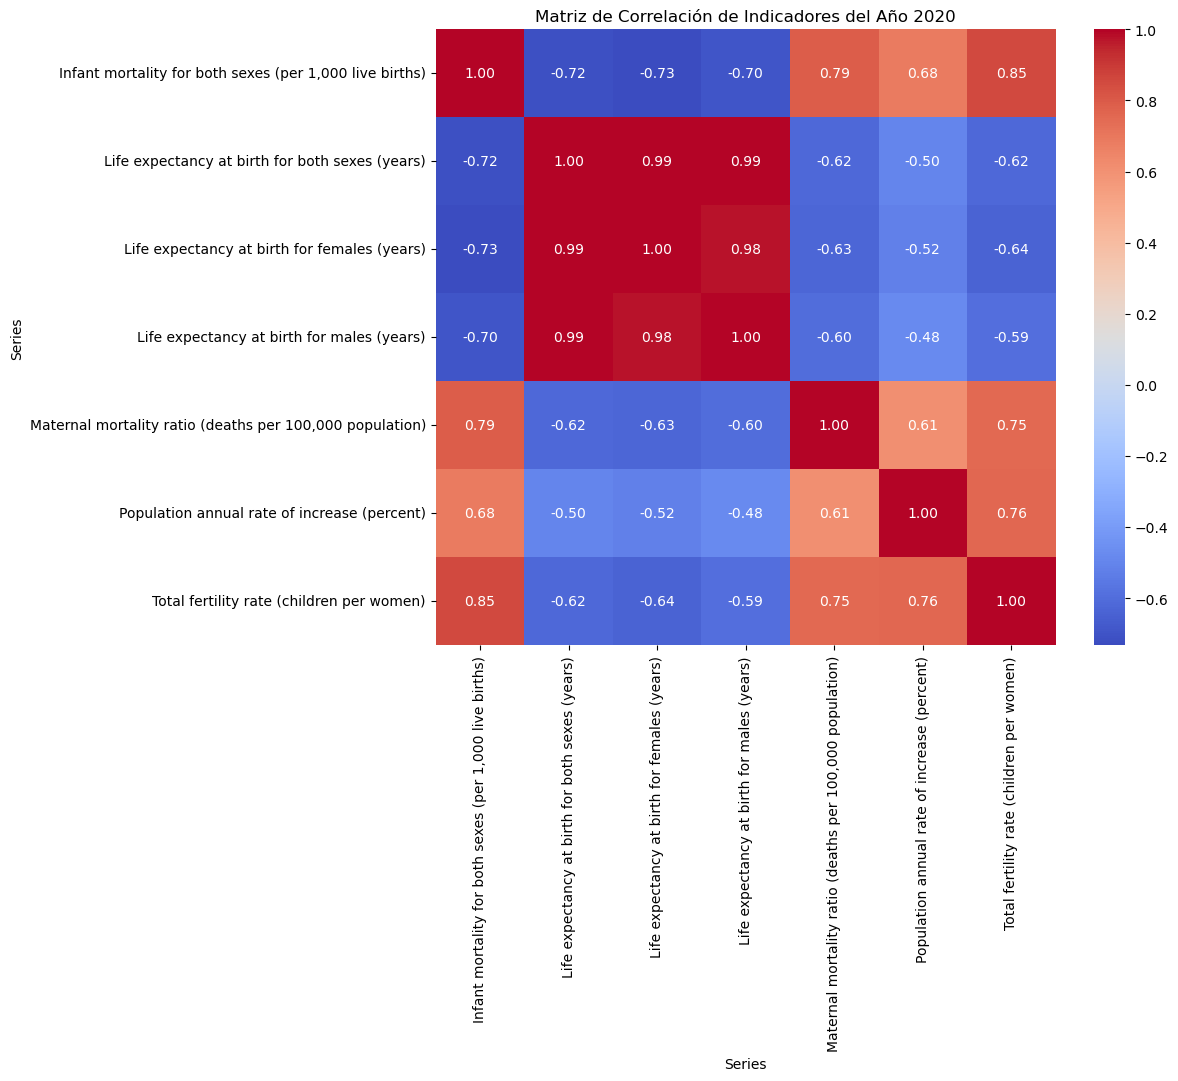

In [22]:
'''
Paso 3 
Asimismo, determine qué variables de esta base de datos se encuentran más correlacionadas en dicho año. Interprete sus resultados.
'''

# Pivotear los datos para tener una columna por cada serie (indicador) y filas por cada país/región
# Esto requiere que 'Region/Country/Area' sea el identificador único de cada fila
pivot_data_2020 = data_2020.pivot(index='Region/Country/Area', columns='Series', values='Value')

# Rellenar valores NA con 0 o algún otro valor apropiado, o eliminar filas con NA si es necesario
pivot_data_2020.fillna(0, inplace=True) # O una imputación más sofisticada según sea necesario

# Calcular la matriz de correlación
correlation_matrix = pivot_data_2020.corr()

# Visualizar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación de Indicadores del Año 2020')
plt.show()


### Conclusiones

Este trabajo ha demostrado el proceso de análisis de datos desde la carga y limpieza de un conjunto de datos complejo hasta la visualización de relaciones clave y el intento de identificar correlaciones entre variables para el año 2020. A través de este proceso, hemos descubierto una relación inversa aparentemente fuerte entre la mortalidad infantil y la esperanza de vida en los países o regiones analizados, lo que subraya cómo los avances en la salud pública y el acceso a la atención médica pueden tener un impacto directo en la longevidad de una población.

Aunque el análisis de correlación entre múltiples variables se vio limitado por la estructura del conjunto de datos y los desafíos inherentes al pre-procesamiento requerido, se proporcionaron las bases y el esquema del código necesario para realizar dicho análisis en el futuro. Este paso adicional permitiría no solo confirmar las relaciones observadas sino también descubrir nuevas interacciones entre los indicadores, proporcionando una comprensión más profunda de los factores que influyen en la salud y el bienestar de las poblaciones a nivel global.

Las conclusiones clave de este trabajo incluyen:

1. **Relación entre mortalidad infantil y esperanza de vida**: Confirmamos visualmente una relación negativa entre la mortalidad infantil y la esperanza de vida, lo que indica que esfuerzos para reducir la mortalidad infantil pueden ser cruciales para mejorar la esperanza de vida en una población.

2. **Importancia de la limpieza y preparación de datos**: El trabajo subraya la importancia crítica de la limpieza y preparación de datos en el análisis de datos. La adecuada preparación de datos es fundamental para garantizar análisis precisos y conclusiones válidas.

3. **Potencial para análisis de correlación más profundos**: Aunque no se realizó un análisis de correlación completo debido a limitaciones de pre-procesamiento, este trabajo sienta las bases para futuros análisis. La exploración de correlaciones entre diversas variables de salud y socioeconómicas puede revelar insights valiosos sobre los determinantes de la salud a nivel global.

En resumen, este análisis proporciona una ventana a las complejidades y el potencial del análisis de datos en el campo de la salud pública y demografía. Futuras investigaciones, aprovechando análisis de correlación más profundos y técnicas de modelado avanzadas, tienen el potencial de desbloquear aún más conocimientos críticos que pueden informar políticas públicas y estrategias de intervención para mejorar la salud y el bienestar de las poblaciones en todo el mundo.